Global statistics
* mean, median, etc.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
# Functions

def symbol_to_path(symbol, base_dir = 'data'):
    '''Return CSV file path given ticker symbol'''
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

def get_data(symbols, dates):
    '''Read stock data (adjusted close) given symbols, from CSV files'''
    df = pd.DataFrame(index = dates)
    if 'SPY' not in symbols:  # Add SPY for reference, if absent
        symbols.insert(0,'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), 
                          index_col = 'Date', 
                          parse_dates = True, 
                          usecols = ['Date', 'Adj Close'], 
                          na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': # drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])
    return df

def plot_data(df, title = 'Stock prices'):
    '''Plot stock prices'''
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

In [3]:
# Define date range
start_date = '2010-01-01'
end_date = '2012-12-31'
dates = pd.date_range(start_date, end_date)

symbols = ['SPY', 'IBM', 'GOOG', 'GLD']

df = get_data(symbols, dates)
plot_data(df)

In [4]:
# Compute global stats for each stock

print 'mean:\n', df.mean()
print '\nmedian:\n',df.median()
print '\nst dev:\n',df.std()

mean:
SPY     115.878879
IBM     150.858003
GOOG           NaN
GLD     145.029775
dtype: float64

median:
SPY     116.973816
IBM     152.871989
GOOG           NaN
GLD     150.294998
dtype: float64

st dev:
SPY     12.036859
IBM     27.332727
GOOG          NaN
GLD     20.897316
dtype: float64


Rolling statistics (within a window)

How do we know if we've diverted far enough from the mean to warrant a trade?  Look at rolling std versus rolling mean.

Bollinger bands (TM)
* Look at 2 std above and below the rolling mean
* when you drop through it and then move back toward it, buy signal
* When you punch through and drop back down, sell signal

In [5]:
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

ax = df['SPY'].plot(title = 'SPY rolling mean', label = 'SPY')

# computer rolling mean with 20-day window

rm_SPY = pd.rolling_mean(df['SPY'], window = 20)

# Add rolling mean to same plot
rm_SPY.plot(label = 'Rolling mean', ax = ax)

# Add axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

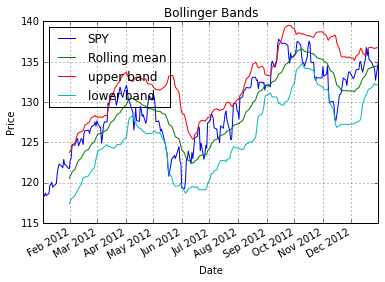

In [14]:
def get_bollinger_bands(rm, rstd):
    '''Return upper and lower Bollinger bands'''
    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd
    return upper_band, lower_band

def get_rolling_mean(df, window):
    return pd.rolling_mean(df, window = window)

def get_rolling_std(df, window):
    return pd.rolling_std(df, window = window)

dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window = 20)

# Compute rolling std
rstd_SPY = get_rolling_std(df['SPY'], window = 20)

# Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean, and Bollinger Bands
ax = df['SPY'].plot(title = 'Bollinger Bands', label = 'SPY')
rm_SPY.plot(label = 'Rolling mean', ax = ax)
upper_band.plot(label = 'upper band', ax = ax)
lower_band.plot(label = 'lower band', ax = ax)

# Add axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

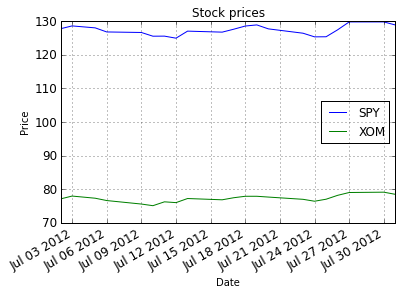

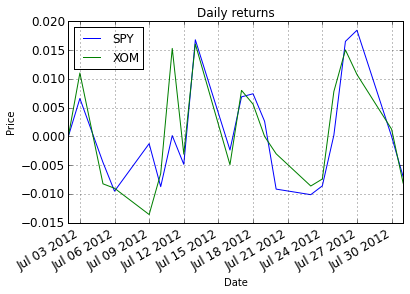

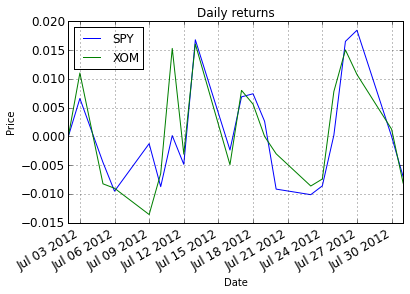

In [30]:
# Daily Returns

dates = pd.date_range('2012-07-01', '2012-07-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

def compute_daily_returns_1(df):
    '''Compute and return the daily return values'''
    daily_returns = df.copy() # copy dataframe to match size, rows and columns
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    daily_returns.ix[0,:] = 0 # set the returns for the first row = 0
    return daily_returns

def compute_daily_returns(df):
    '''Compute and return daily return values using pandas'''
    daily_returns = (df / df.shift(1)) - 1 # pandas shifts *back*
    daily_returns.ix[0,:] = 0 # pandas puts NaNs in row 0
    return daily_returns
    
daily_1 = compute_daily_returns_1(df)
plot_data(daily_1, title = 'Daily returns using ndarray')

daily = compute_daily_returns(df)
plot_data(daily, title = 'Daily returns using Pandas')

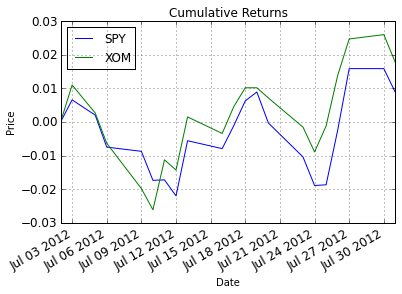

In [57]:
# Cumulative returns  (not implemented!)

dates = pd.date_range('2012-07-01', '2012-07-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
# plot_data(df)

def compute_cumulative_returns(df):
    '''Compute and return cumulative return values'''
    cum_returns = df.copy() # copy dataframe to match size, rows and columns
    cum_returns = (df/df.ix[0,:].values) - 1
    return cum_returns
    

cum = compute_cumulative_returns(df)
plot_data(cum, title = 'Cumulative Returns')